In [70]:
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

import requests
from bs4 import BeautifulSoup 
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols, glm 
import statsmodels.api as sm

## 기본투구 지표 크롤링
- STATIZ(야구 데이터 사이트) 크롤링
- 2022 정규시즌 규정 이닝 50%을 채운 56명의 투수들을 대상으로 진행
- STATIZ에 있는 투구 지표 중 기본 지표를 사용함

In [2]:
def crawl_pitcher(url) :
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    
    data = []

    trs = soup.find_all('tr')
    for tr in trs:
        tds = tr.find_all('td')
        for td in tds:
            data.append(td.text)
            
    n = 33
    result = [data[i * n:(i + 1) * n] for i in range((len(data) + n - 1) // n)]
    
    df = pd.DataFrame(result, columns = ['순','이름','팀','ERA','출장','완투','완봉','선발','승','패','세','홀드','이닝','실점','자책','타자','안타','2타','3타','홈런','볼넷','고4','사구','삼진','보크','폭투','ERA','FIP','WHIP','ERA+','FIP+', 'WAR', 'WPA'] )
    
    return df

In [3]:
p_basic_url = 'http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=ERAP&o2=OutCount&de=0&lr=0&tr=&cv=&ml=1&sn=100&si=&cn='

In [4]:
pitcher_basic = crawl_pitcher(p_basic_url)

In [5]:
pitcher_basic = pitcher_basic.drop(pitcher_basic.index[-7:])
pitcher_basic = pitcher_basic.drop(pitcher_basic.columns[0], axis = 1)
pitcher_basic = pitcher_basic.loc[:, ~pitcher_basic.T.duplicated(keep = 'first')]
pitcher_basic

,이름,팀,ERA,출장,완투,완봉,선발,승,패,세,...,사구,삼진,보크,폭투,FIP,WHIP,ERA+,FIP+,WAR,WPA
0,모리만도,22S,1.67,12,0,0,12,7,1,0,...,4,67,0,2,2.98,1.06,248.9,139.8,3.12,2.28
1,김민수,22K,1.90,76,0,0,0,5,4,3,...,6,91,0,6,2.24,1.00,217.1,182.9,4.01,2.33
2,구창모,22N,2.10,19,0,0,19,11,5,0,...,4,108,0,7,3.11,1.08,194.4,132.0,3.96,2.49
3,안우진,22키,2.11,30,1,0,30,15,8,0,...,4,224,1,7,2.21,0.95,189.3,179.1,7.92,5.65
4,김광현,22S,2.13,28,0,0,28,13,3,0,...,5,153,0,1,3.15,1.07,195.5,132.7,6.10,3.63
5,플럿코,22L,2.39,28,0,0,28,15,5,0,...,2,149,0,6,3.25,1.01,166.4,121.6,4.79,2.44
6,놀린,22K,2.47,21,0,0,21,8,8,0,...,8,108,1,4,3.08,1.12,165.2,133.0,3.49,1.79
7,수아레즈,22삼,2.49,30,0,0,29,6,8,0,...,4,159,0,6,2.96,1.16,167.8,138.0,5.28,2.70
8,켈리,22L,2.54,27,0,0,27,16,4,0,...,2,153,0,3,2.95,1.08,156.3,134.7,5.19,3.45
9,요키시,22키,2.57,30,0,0,30,10,8,0,...,5,154,0,2,2.85,1.09,155.4,138.8,5.68,3.57


In [6]:
pitcher_basic.to_csv("basic.csv", index = False, encoding = 'utf-8-sig')

## 확장투구 지표 크롤링
- STATIZ(야구 데이터 사이트) 크롤링

In [7]:
def crawl_pitcher2(url) :
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    
    data = []

    trs = soup.find_all('tr')
    for tr in trs:
        tds = tr.find_all('td')
        for td in tds:
            data.append(td.text)
            
    n = 30
    result = [data[i * n:(i + 1) * n] for i in range((len(data) + n - 1) // n)]
    
    df = pd.DataFrame(result, columns = ['순','이름','팀','FIP','출장','이닝','ERA','FIP','K/9','BB/9','K/BB','HR/9','K%','BB%','K-BB%','PFR','BABIP','LOB%','타율(상대)','출루율(상대)','장타율(상대)','OPS(상대)','WHIP','WHIP+','투구','IP/G','P/G','P/IP','P/PA','CYP+'] )
    
    return df

In [8]:
p_plus_url = 'http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=2&o1=FIP&de=0&o2=WAR&lr=0&tr=&cv=&ml=1&sn=100&si=&cn='
pitcher_plus = crawl_pitcher2(p_plus_url)

In [9]:
pitcher_plus = pitcher_plus.drop(pitcher_plus.index[-8:])
pitcher_plus = pitcher_plus.drop(pitcher_plus.columns[0], axis = 1)
pitcher_plus = pitcher_plus.loc[:, ~pitcher_plus.T.duplicated(keep = 'first')]
pitcher_plus

,이름,팀,FIP,출장,이닝,ERA,K/9,BB/9,K/BB,HR/9,...,장타율(상대),OPS(상대),WHIP,WHIP+,투구,IP/G,P/G,P/IP,P/PA,CYP+
0,안우진,22키,2.21,30,196.0,2.11,10.29,2.53,4.07,0.18,...,.268,.518,0.95,0.97,3003,6.5,100.1,15.3,3.92,89.4
1,김민수,22K,2.24,76,80.2,1.90,10.15,1.67,6.07,0.34,...,.302,.571,1.00,1.08,1213,1.1,16.0,15.0,3.71,37.4
2,고영표,22K,2.75,28,182.1,3.26,7.70,1.14,6.78,0.35,...,.351,.657,1.17,1.26,2617,6.5,93.5,14.4,3.45,53.8
3,나균안,22롯,2.79,39,117.2,3.98,9.41,2.83,3.32,0.38,...,.397,.727,1.38,1.40,1961,3.0,50.3,16.7,3.88,22.1
4,요키시,22키,2.85,30,185.1,2.57,7.48,1.60,4.67,0.39,...,.331,.613,1.09,1.12,2912,6.2,97.1,15.7,3.90,65.1
5,박세웅,22롯,2.89,28,157.1,3.78,8.35,1.83,4.56,0.46,...,.387,.715,1.35,1.40,2599,5.6,92.8,16.5,3.83,37.3
6,루친스키,22N,2.91,31,193.2,2.97,9.02,1.58,5.71,0.65,...,.357,.645,1.13,1.17,2974,6.3,95.9,15.4,3.73,62.2
7,켈리,22L,2.95,27,166.1,2.54,8.28,1.89,4.37,0.54,...,.309,.583,1.08,1.09,2515,6.2,93.2,15.1,3.79,67.5
8,수아레즈,22삼,2.96,30,173.2,2.49,8.24,2.59,3.18,0.36,...,.293,.583,1.16,1.18,2959,5.8,98.6,17.0,4.14,60.7
9,모리만도,22S,2.98,12,75.1,1.67,8.00,2.75,2.91,0.24,...,.260,.539,1.06,1.12,1178,6.3,98.2,15.6,3.88,37.4


In [10]:
pitcher_plus.to_csv("plus.csv", index = False, encoding = 'utf-8-sig')

### 구장별 평균 WHIP과 파크팩터, 구장 크기 상관분석
- 파크팩터: 구장의 성향을 나타내는 지표로 각 구장의 타자/투수 별 유불리를 알 수 있으며, 아래 사용한 자료는 단타 파크팩터이다.
- 구장 크기: (좌/우 펜스 거리 + 중앙 펜스 거리) / 2로 설정

In [11]:
players = pitcher_basic['이름']

### 구장별 WHIP 크롤링
- 각 구장 별 WHIP의 평균을 구해서 구장 관련 지표들과 상관분석

In [12]:
tiger_url = 'http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=15&o1=ERAP&o2=OutCount&de=0&lr=0&tr=&cv=&ml=1&sn=100&si=......350..............&cn=ERAP,,0,WHIP,,0'

In [13]:
def crawl_pitcher3(url) :
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    
    data = []

    trs = soup.find_all('tr')
    for tr in trs:
        tds = tr.find_all('td')
        for td in tds:
            data.append(td.text)
            
    n = 31
    result = [data[i * n:(i + 1) * n] for i in range((len(data) + n - 1) // n)]
    
    df = pd.DataFrame(result, columns = ['순','이름','팀','ERA','출장','선발','완투','완봉','승','패','홀드','세','이닝','실점','자책','타자','타수','안타','2타','3타','홈런','볼넷','고4','사구','삼진','투구','WHIP','타율','출루율','OPS','ERA'] )
    
    return df

In [14]:
tiger_df = crawl_pitcher3(tiger_url)

In [15]:
tiger_df = tiger_df.drop(tiger_df.index[-7:])
tiger_df = tiger_df.drop(tiger_df.columns[0], axis = 1)
tiger_df = tiger_df.loc[:,~tiger_df.T.duplicated(keep='first')]
tiger_df.head() # 광주 기아 챔피언스 필드 투구 지표

,이름,팀,ERA,출장,선발,완투,승,패,홀드,세,...,홈런,볼넷,고4,사구,삼진,투구,WHIP,타율,출루율,OPS
0,김시훈,22N,0.00,4,1,0,0,0,1,0,...,0,5,0,1,6,148,1.70,.267,.389,.656
1,모리만도,22S,0.00,1,1,0,0,0,0,0,...,0,1,0,0,3,106,0.86,.192,.222,.415
2,김기훈,22K,0.00,3,0,0,0,0,0,0,...,0,4,0,0,6,112,1.00,.100,.250,.350
3,라미레즈,22한,0.00,1,1,0,0,0,0,0,...,0,1,0,0,3,87,0.33,.053,.100,.205
4,요키시,22키,0.61,2,2,0,2,0,0,0,...,1,2,0,0,13,200,0.82,.200,.231,.491


In [16]:
WHIP_tigers = tiger_df[['이름','WHIP']] 
WHIP_tigers = WHIP_tigers.astype({'이름':'string'}) 
WHIP_tigers = WHIP_tigers.astype({'WHIP':'float'}) 
result = pd.merge(players, WHIP_tigers)
mean_tigers = result['WHIP'].mean()
mean_tigers

1.3630303030303033

In [17]:
lions_url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=15&o1=ERAP&o2=OutCount&de=0&lr=0&tr=&cv=&ml=1&sn=100&pa=0&cn=ERAP%2C%2C0%2CWHIP%2C%2C0&si=999&si_it=&si_wd=&si_tm=&si_ha=&si_te=&si_st=352&si_as=&si_or=&si_ty=&si_pl=&si_in=&si_on=&si_um=&si_oc=&si_bs=&si_sc=&si_cnt=&si_aft=&si_li='

lions_df = crawl_pitcher3(lions_url)

In [18]:
lions_df = lions_df.drop(lions_df.index[-8:])
lions_df = lions_df.drop(lions_df.columns[0], axis = 1)
lions_df = lions_df.loc[:,~lions_df.T.duplicated(keep='first')]
lions_df # 대구 라이온즈파크 투구 지표

,이름,팀,ERA,출장,선발,완투,승,패,홀드,세,...,홈런,볼넷,고4,사구,삼진,투구,WHIP,타율,출루율,OPS
0,놀린,22K,0.00,1,1,0,1,0,0,0,...,0,1,0,1,7,84,1.14,.269,.321,.591
1,반즈,22롯,0.00,1,1,0,1,0,0,0,...,0,0,0,0,6,93,0.86,.222,.222,.482
2,요키시,22키,0.00,1,1,0,1,0,0,0,...,0,1,0,0,7,91,0.75,.167,.200,.408
3,신민혁,22N,0.00,1,1,0,0,0,0,0,...,0,1,0,1,5,94,0.63,.136,.208,.345
4,김태훈,22키,0.00,6,0,0,0,0,1,3,...,0,3,0,0,3,79,1.33,.250,.348,.648
5,안우진,22키,0.63,2,2,0,2,0,0,0,...,0,3,0,0,12,197,0.63,.120,.170,.290
6,구창모,22N,0.84,2,2,0,2,0,0,0,...,0,5,0,0,10,179,1.50,.262,.340,.602
7,김택형,22S,1.42,5,0,0,1,0,0,1,...,1,0,0,0,5,88,0.32,.095,.095,.381
8,나균안,22롯,1.50,3,1,0,0,0,0,0,...,0,2,0,0,13,178,0.83,.186,.222,.548
9,폰트,22S,1.50,1,1,0,0,0,0,0,...,0,1,0,0,6,86,0.67,.150,.191,.391


In [19]:
WHIP_lions = lions_df[['이름','WHIP']] 
WHIP_lions = WHIP_lions.astype({'이름':'string'}) 
WHIP_lions = WHIP_lions.astype({'WHIP':'float'}) 
result = pd.merge(players, WHIP_lions)
mean_lions = result['WHIP'].mean()
mean_lions

1.328823529411765

In [20]:
eagles_url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=15&o1=ERAP&o2=OutCount&de=0&lr=0&tr=&cv=&ml=1&sn=100&pa=0&cn=ERAP%2C%2C0%2CWHIP%2C%2C0&si=999&si_it=&si_wd=&si_tm=&si_ha=&si_te=&si_st=353&si_as=&si_or=&si_ty=&si_pl=&si_in=&si_on=&si_um=&si_oc=&si_bs=&si_sc=&si_cnt=&si_aft=&si_li='

eagles_df = crawl_pitcher3(eagles_url)

In [21]:
eagles_df = eagles_df.drop(eagles_df.index[-9:])
eagles_df = eagles_df.drop(eagles_df.columns[0], axis = 1)
eagles_df = eagles_df.loc[:,~eagles_df.T.duplicated(keep='first')]
eagles_df # 대전 이글스파크 투구 지표

,이름,팀,ERA,출장,선발,완투,완봉,승,패,홀드,...,홈런,볼넷,고4,사구,삼진,투구,WHIP,타율,출루율,OPS
0,김윤식,22L,0.00,1,1,0,0,1,0,0,...,0,1,0,0,5,81,0.83,.191,.227,.418
1,스파크맨,22롯,0.00,1,1,0,0,1,0,0,...,0,4,0,0,9,92,1.00,.095,.240,.335
2,김광현,22S,0.00,1,1,0,0,1,0,0,...,0,1,0,0,8,83,0.83,.191,.227,.418
3,노경은,22S,0.82,3,2,0,0,1,1,0,...,0,3,0,0,11,175,1.00,.205,.262,.518
4,한승혁,22K,1.29,2,1,0,0,1,0,0,...,0,4,0,1,8,124,1.43,.261,.379,.684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,브랜든,22두,7.50,1,1,0,0,1,0,0,...,0,2,0,0,4,106,1.17,.217,.280,.584
59,윤대경,22한,9.15,14,8,0,0,3,6,0,...,4,10,0,4,31,710,1.91,.378,.418,.959
60,이민호,22L,9.26,3,3,0,0,1,1,0,...,1,6,0,1,5,235,2.06,.360,.431,1.011
61,정찬헌,22키,9.35,2,2,0,0,0,0,0,...,1,3,0,0,5,158,2.08,.385,.429,1.044


In [22]:
WHIP_eagles = eagles_df[['이름','WHIP']] 
WHIP_eagles = WHIP_eagles.astype({'이름':'string'}) 
WHIP_eagles = WHIP_eagles.astype({'WHIP':'float'}) 
result = pd.merge(players, WHIP_eagles)
mean_eagles = result['WHIP'].mean()
mean_eagles

1.3019444444444441

In [26]:
heroes_url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=15&o1=ERAP&o2=OutCount&de=0&lr=0&tr=&cv=&ml=1&sn=100&pa=0&cn=ERAP%2C%2C0%2CWHIP%2C%2C0&si=999&si_it=&si_wd=&si_tm=&si_ha=&si_te=&si_st=362&si_as=&si_or=&si_ty=&si_pl=&si_in=&si_on=&si_um=&si_oc=&si_bs=&si_sc=&si_cnt=&si_aft=&si_li='

heroes_df = crawl_pitcher3(heroes_url)

In [27]:
heroes_df = heroes_df.drop(heroes_df.index[-7:])
heroes_df = heroes_df.drop(heroes_df.columns[0], axis = 1)
heroes_df = heroes_df.loc[:,~heroes_df.T.duplicated(keep='first')]
heroes_df.head() # 고척 스카이돔 투구 지표

,이름,팀,ERA,출장,선발,완투,승,패,홀드,세,...,홈런,볼넷,고4,사구,삼진,투구,WHIP,타율,출루율,OPS
0,폰트,22S,0.00,1,1,0,1,0,0,0,...,0,1,0,0,6,96,0.86,.200,.231,.471
1,허윤동,22삼,0.00,1,1,0,1,0,0,0,...,0,2,0,1,7,88,0.67,.100,.217,.317
2,파노니,22K,0.00,1,1,0,1,0,0,0,...,0,2,0,0,8,98,1.00,.182,.250,.432
3,이영하,22두,0.66,2,2,0,2,0,0,0,...,0,5,0,0,12,209,0.81,.130,.216,.346
4,벤자민,22K,0.90,2,2,0,1,0,0,0,...,0,3,0,0,7,142,0.80,.152,.222,.404


In [28]:
WHIP_heroes = heroes_df[['이름','WHIP']] 
WHIP_heroes = WHIP_heroes.astype({'이름':'string'}) 
WHIP_heroes = WHIP_heroes.astype({'WHIP':'float'}) 
result = pd.merge(players, WHIP_heroes)
mean_heroes = result['WHIP'].mean()
mean_heroes

1.2443750000000002

In [29]:
landers_url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=15&o1=ERAP&o2=OutCount&de=0&lr=0&tr=&cv=&ml=1&sn=100&pa=0&cn=ERAP%2C%2C0%2CWHIP%2C%2C0&si=999&si_it=&si_wd=&si_tm=&si_ha=&si_te=&si_st=355&si_as=&si_or=&si_ty=&si_pl=&si_in=&si_on=&si_um=&si_oc=&si_bs=&si_sc=&si_cnt=&si_aft=&si_li='

landers_df = crawl_pitcher3(landers_url)

In [30]:
landers_df = landers_df.drop(landers_df.index[-7:])
landers_df = landers_df.drop(landers_df.columns[0], axis = 1)
landers_df = landers_df.loc[:,~landers_df.T.duplicated(keep='first')]
landers_df.head() # 문학 랜더스필드 투구 지표

,이름,팀,ERA,출장,선발,완투,완봉,승,패,홀드,...,홈런,볼넷,고4,사구,삼진,투구,WHIP,타율,출루율,OPS
0,파노니,22K,0.00,1,1,0,0,1,0,0,...,0,1,0,0,6,91,0.43,.087,.125,.212
1,양현종,22K,0.00,1,1,0,0,0,0,0,...,0,1,0,0,7,81,0.50,.100,.143,.343
2,스탁,22두,1.13,2,2,0,0,1,0,0,...,0,4,0,1,7,120,1.00,.154,.290,.444
3,브랜든,22두,1.17,1,1,0,0,1,0,0,...,0,2,0,0,3,101,0.91,.200,.259,.499
4,소형준,22K,1.29,1,1,0,0,0,0,0,...,0,1,0,0,7,93,0.86,.200,.231,.431


In [31]:
WHIP_landers = landers_df[['이름','WHIP']] 
WHIP_landers = WHIP_landers.astype({'이름':'string'}) 
WHIP_landers = WHIP_landers.astype({'WHIP':'float'}) 
result = pd.merge(players, WHIP_landers)
mean_landers = result['WHIP'].mean()
mean_landers

1.185142857142857

In [32]:
giants_url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=15&o1=ERAP&o2=OutCount&de=0&lr=0&tr=&cv=&ml=1&sn=100&pa=0&cn=ERAP%2C%2C0%2CWHIP%2C%2C0&si=999&si_it=&si_wd=&si_tm=&si_ha=&si_te=&si_st=356&si_as=&si_or=&si_ty=&si_pl=&si_in=&si_on=&si_um=&si_oc=&si_bs=&si_sc=&si_cnt=&si_aft=&si_li='

giants_df = crawl_pitcher3(giants_url)

In [33]:
giants_df = giants_df.drop(giants_df.index[-7:])
giants_df = giants_df.drop(giants_df.columns[0], axis = 1)
giants_df = giants_df.loc[:,~giants_df.T.duplicated(keep='first')]
giants_df.head() # 부산 사직구장 투구 지표

,이름,팀,ERA,출장,선발,완투,승,패,홀드,세,...,홈런,볼넷,고4,사구,삼진,투구,WHIP,타율,출루율,OPS
0,고영표,22K,0.00,1,1,1,1,0,0,0,...,0,0,0,0,9,100,0.56,.167,.167,.367
1,스탁,22두,0.00,1,1,0,1,0,0,0,...,0,3,0,0,4,113,1.04,.192,.276,.507
2,모리만도,22S,0.00,1,1,0,1,0,0,0,...,0,1,0,0,7,99,0.78,.179,.207,.386
3,임찬규,22L,0.00,1,1,0,1,0,0,0,...,0,3,0,0,4,82,0.95,.136,.240,.376
4,김대우,22롯,0.00,5,0,0,0,0,0,0,...,0,3,0,0,4,92,0.83,.105,.227,.438


In [34]:
WHIP_giants = giants_df[['이름','WHIP']] 
WHIP_giants = WHIP_giants.astype({'이름':'string'}) 
WHIP_giants = WHIP_giants.astype({'WHIP':'float'}) 
result = pd.merge(players, WHIP_giants)
mean_giants = result['WHIP'].mean()
mean_giants

1.276764705882353

In [38]:
wiz_url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=15&o1=ERAP&o2=OutCount&de=0&lr=0&tr=&cv=&ml=1&sn=100&pa=0&cn=ERAP%2C%2C0%2CWHIP%2C%2C0&si=999&si_it=&si_wd=&si_tm=&si_ha=&si_te=&si_st=357&si_as=&si_or=&si_ty=&si_pl=&si_in=&si_on=&si_um=&si_oc=&si_bs=&si_sc=&si_cnt=&si_aft=&si_li='

wiz_df = crawl_pitcher3(wiz_url)

In [39]:
wiz_df = wiz_df.drop(wiz_df.index[-7:])
wiz_df = wiz_df.drop(wiz_df.columns[0], axis = 1)
wiz_df = wiz_df.loc[:,~wiz_df.T.duplicated(keep='first')]
wiz_df.head() # 수원 위즈파크 투구 지표

,이름,팀,ERA,출장,선발,완투,승,패,홀드,세,...,홈런,볼넷,고4,사구,삼진,투구,WHIP,타율,출루율,OPS
0,오원석,22S,0.00,3,3,0,2,0,0,0,...,0,6,0,0,19,301,0.85,.143,.217,.360
1,박세웅,22롯,0.00,3,3,0,3,0,0,0,...,0,4,0,1,17,292,0.88,.177,.239,.449
2,요키시,22키,0.00,2,2,0,1,0,0,0,...,0,2,0,0,10,213,0.84,.196,.226,.423
3,김윤식,22L,0.00,2,2,0,0,0,0,0,...,0,3,0,0,10,158,1.03,.206,.263,.469
4,페냐,22한,0.00,1,1,0,0,0,0,0,...,1,1,0,1,6,92,1.00,.217,.280,.628


In [40]:
WHIP_wiz = wiz_df[['이름','WHIP']] 
WHIP_wiz = WHIP_wiz.astype({'이름':'string'}) 
WHIP_wiz = WHIP_wiz.astype({'WHIP':'float'}) 
result = pd.merge(players, WHIP_wiz)
mean_wiz = result['WHIP'].mean()
mean_wiz

1.155151515151515

In [41]:
jamsil_url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=15&o1=ERAP&o2=OutCount&de=0&lr=0&tr=&cv=&ml=1&sn=100&pa=0&cn=ERAP%2C%2C0%2CWHIP%2C%2C0&si=999&si_it=&si_wd=&si_tm=&si_ha=&si_te=&si_st=358&si_as=&si_or=&si_ty=&si_pl=&si_in=&si_on=&si_um=&si_oc=&si_bs=&si_sc=&si_cnt=&si_aft=&si_li='

jamsil_df = crawl_pitcher3(jamsil_url)

In [42]:
jamsil_df = jamsil_df.drop(jamsil_df.index[-8:])
jamsil_df = jamsil_df.drop(jamsil_df.columns[0], axis = 1)
jamsil_df = jamsil_df.loc[:,~jamsil_df.T.duplicated(keep='first')]
jamsil_df.head() # 잠실 구장 투구 지표

,이름,팀,ERA,출장,선발,완투,완봉,승,패,홀드,...,홈런,볼넷,고4,사구,삼진,투구,WHIP,타율,출루율,OPS
0,장민재,22한,0.57,3,3,0,0,2,0,0,...,0,11,0,0,8,283,1.40,.208,.344,.570
1,정우영,22L,1.07,38,0,0,0,1,0,21,...,1,14,2,4,20,508,1.04,.183,.293,.511
2,고우석,22L,1.14,32,0,0,0,2,0,0,...,2,7,1,0,39,463,0.76,.157,.209,.459
3,이우찬,22L,1.21,22,0,0,0,2,0,1,...,1,13,1,0,29,469,1.15,.198,.286,.550
4,나균안,22롯,1.33,6,2,0,0,1,1,0,...,0,6,0,0,26,314,1.08,.216,.275,.532


In [43]:
WHIP_jamsil = jamsil_df[['이름','WHIP']] 
WHIP_jamsil = WHIP_jamsil.astype({'이름':'string'}) 
WHIP_jamsil = WHIP_jamsil.astype({'WHIP':'float'}) 
result = pd.merge(players, WHIP_jamsil)
mean_jamsil = result['WHIP'].mean()
mean_jamsil

1.3352941176470587

In [44]:
dinos_url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=2022&ye=2022&se=0&te=&tm=&ty=0&qu=p50&po=0&as=&ae=&hi=&un=&pl=&da=15&o1=ERAP&o2=ERAP&de=0&lr=0&tr=&cv=0&ml=1&sn=100&pa=0&cn=ERAP%2C%2C0%2CWHIP%2C%2C0&si=999&si_it=&si_wd=&si_tm=&si_ha=2&si_te=NC&si_st=&si_as=&si_or=&si_ty=&si_pl=&si_in=&si_on=&si_um=&si_oc=&si_bs=&si_sc=&si_cnt=&si_aft=&si_li='

dinos_df = crawl_pitcher3(dinos_url)

In [45]:
dinos_df = dinos_df.drop(dinos_df.index[-11:])
dinos_df = dinos_df.drop(dinos_df.columns[0], axis = 1)
dinos_df = dinos_df.loc[:,~dinos_df.T.duplicated(keep='first')]
dinos_df.head() # 창원 NC파크 투구 지표

,이름,팀,ERA,출장,선발,완투,승,패,홀드,세,...,홈런,볼넷,고4,사구,삼진,투구,WHIP,타율,출루율,OPS
0,폰트,22S,0.00,1,1,0,1,0,0,0,...,0,0,0,0,9,104,0.00,.000,.000,.000
1,박종훈,22S,0.00,1,1,0,1,0,0,0,...,0,3,0,1,6,106,0.86,.136,.269,.451
2,김재영,22한,0.00,2,1,0,0,1,0,0,...,1,1,0,0,2,73,1.67,.308,.333,1.026
3,강재민,22한,0.00,3,0,0,0,0,0,0,...,0,2,1,2,3,57,1.33,.182,.400,.582
4,장현식,22K,0.00,4,0,0,0,0,3,0,...,0,0,0,1,2,55,0.46,.143,.200,.343


In [46]:
WHIP_dinos = dinos_df[['이름','WHIP']] 
WHIP_dinos = WHIP_dinos.astype({'이름':'string'}) 
WHIP_dinos = WHIP_dinos.astype({'WHIP':'float'}) 
result = pd.merge(players, WHIP_dinos)
mean_dinos = result['WHIP'].mean()
mean_dinos

1.2944736842105262

In [47]:
park_mean = pd.DataFrame({'구장': ['대구', '광주', '대전', '사직', '인천', '잠실', '수원', '창원', '고척'],
                          '평균 WHIP': [mean_lions, mean_tigers, mean_eagles, mean_giants, mean_landers, mean_jamsil, mean_wiz, mean_dinos, mean_heroes]})
park_factor1 = pd.DataFrame({'구장': ['대구', '광주', '대전', '사직', '인천', '잠실', '수원', '창원', '고척'],
                            '파크팩터(단타)': [982, 1031, 963, 1011, 1008, 993, 1029, 988, 1012]})

result = pd.merge(park_mean, park_factor1)

In [48]:
park_size = pd.DataFrame({'구장': ['대구', '사직', '창원', '대전', '수원', '광주', '고척', '인천', '잠실'],
                        '구장 크기': [(99+122)/2, (95+118)/2, (101+121)/2, (100+122)/2,
                        (95+120)/2, (99+121)/2, (100+125)/2, (95+120)/2, (100+125)/2]})
result = pd.merge(result, park_size)

In [49]:
result.to_csv("WHIP_park.csv", index = False, encoding = 'utf-8-sig')
result

,구장,평균 WHIP,파크팩터(단타),구장 크기
0,대구,1.328824,982,110.5
1,광주,1.363030,1031,110.0
2,대전,1.301944,963,111.0
3,사직,1.276765,1011,106.5
4,인천,1.185143,1008,107.5
5,잠실,1.335294,993,112.5
6,수원,1.155152,1029,107.5
7,창원,1.294474,988,111.0
8,고척,1.244375,1012,112.5


In [50]:
result.corr()  # 상관계수

,평균 WHIP,파크팩터(단타),구장 크기
평균 WHIP,1.000000,-0.358410,0.539612
파크팩터(단타),-0.358410,1.000000,-0.440734
구장 크기,0.539612,-0.440734,1.000000


<AxesSubplot:>

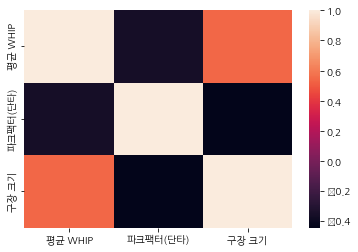

In [54]:
sns.heatmap(result.corr())  # 시각화

## WHIP와 연관 있는 지표 찾기
### WHIP는 (볼넷+피안타)/이닝 으로 직접적인 변수는 포함 X
### 기본 투구 지표 -자책, 삼진, WPA (추가한 승리 확률), 폭투, 사구
### 확장 투구 지표 - K%(삼진/상대타자), BABIP(인플레이된 타구의 비율), LOB%(잔루율), 타율(상대타자), OPS(상대타자)    

In [55]:
# batting average
p_average = pitcher_basic[['이름','WHIP']] 
p_average = p_average.astype({'이름':'string'}) 
p_average = p_average.astype({'WHIP':'float'})

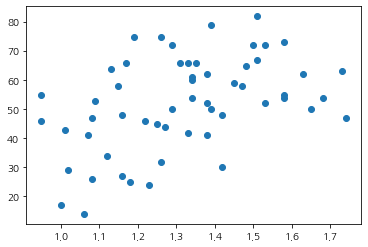

In [56]:
# 자책 (Remorse)

Remorse = pitcher_basic[['이름', '자책']]
Remorse = Remorse.astype({'이름':'string'}) 
Remorse = Remorse.astype({'자책' :'float'})
result = pd.merge(p_average, Remorse)
    
plt.scatter("WHIP", '자책', data = result)

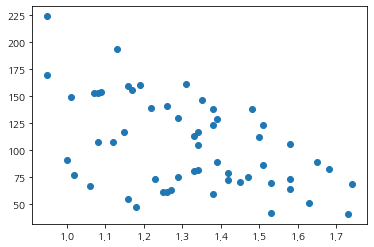

In [57]:
# 삼진 (K)

K = pitcher_basic[['이름', '삼진']]
K = K.astype({'이름':'string'}) 
K = K.astype({'삼진' :'float'})
result = pd.merge(result, K)
    
plt.scatter("WHIP", '삼진', data = result)

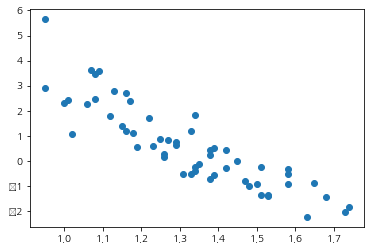

In [58]:
# WPA (추가한 승리 확률)

WPA = pitcher_basic[['이름', 'WPA']]
WPA = WPA.astype({'이름':'string'}) 
WPA = WPA.astype({'WPA' :'float'})
result = pd.merge(result, WPA)
    
plt.scatter("WHIP", 'WPA', data = result)

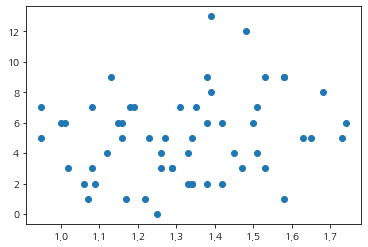

In [59]:
# 폭투 (Wild_fight) 

Wild_fight = pitcher_basic[['이름', '폭투']]
Wild_fight = Wild_fight.astype({'이름':'string'}) 
Wild_fight = Wild_fight.astype({'폭투' :'float'})
result = pd.merge(result, Wild_fight)
    
plt.scatter("WHIP", '폭투', data = result)

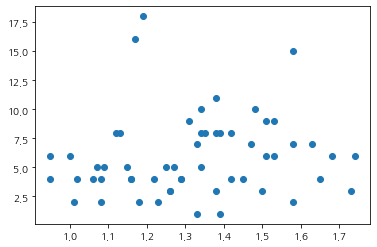

In [60]:
# 사구 (Dune) -몸에 맞는 볼을 의미

Dune = pitcher_basic[['이름', '사구']]
Dune = Dune.astype({'이름':'string'}) 
Dune = Dune.astype({'사구' :'float'})
result = pd.merge(result, Dune)
    
plt.scatter("WHIP", '사구', data = result)

K%(삼진/상대타자), BABIP(인플레이된 타구의 비율), LOB%(잔루율), 타율(상대타자), OPS(상대타자)    

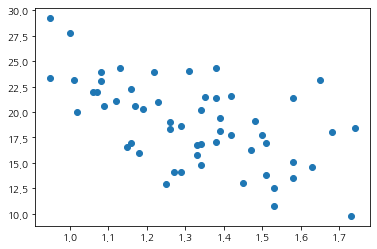

In [61]:
# K% (삼진/상대타자) 

K_rate = pitcher_plus[['이름', 'K%']]
K_rate = K_rate.astype({'이름':'string'}) 
K_rate = K_rate.astype({'K%' :'float'})
result = pd.merge(result, K_rate)
    
plt.scatter("WHIP", 'K%', data = result)

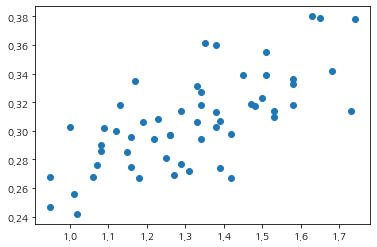

In [62]:
# BABIP (인플레이된 타구의 비율) 

BABIP = pitcher_plus[['이름', 'BABIP']]
BABIP = BABIP.astype({'이름':'string'}) 
BABIP = BABIP.astype({'BABIP' :'float'})
result = pd.merge(result, BABIP)
    
plt.scatter("WHIP", 'BABIP', data = result)

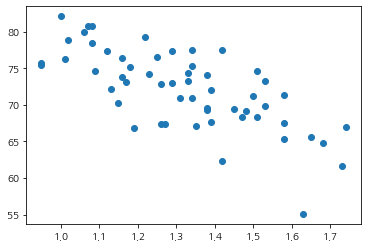

In [63]:
# LOB% (잔루율) 

LOB_rate = pitcher_plus[['이름', 'LOB%']]
LOB_rate = LOB_rate.astype({'이름':'string'}) 
LOB_rate = LOB_rate.astype({'LOB%' :'float'})
result = pd.merge(result, LOB_rate)
    
plt.scatter("WHIP", 'LOB%', data = result)

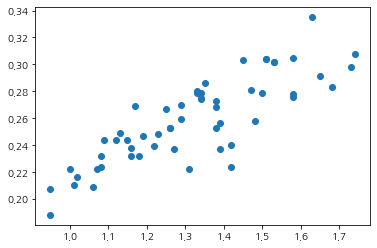

In [64]:
# 타율(상대) - batting average_opponet batter

ba_op = pitcher_plus[['이름', '타율(상대)']]
ba_op = ba_op.astype({'이름':'string'}) 
ba_op = ba_op.astype({'타율(상대)' :'float'})
result = pd.merge(result, ba_op)
    
plt.scatter("WHIP", '타율(상대)', data = result)

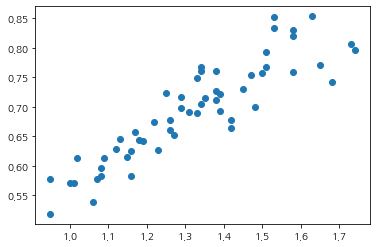

In [65]:
# OPS(상대) - OPS_opponent batter

OPS_op = pitcher_plus[['이름', 'OPS(상대)']]
OPS_op = OPS_op.astype({'이름':'string'}) 
OPS_op = OPS_op.astype({'OPS(상대)' :'float'})
result = pd.merge(result, OPS_op)
    
plt.scatter("WHIP", 'OPS(상대)', data = result)

In [67]:
result.to_csv("pitching.csv", index = False, encoding = 'utf-8-sig')

In [68]:
result.corr()

,WHIP,자책,삼진,WPA,폭투,사구,K%,BABIP,LOB%,타율(상대),OPS(상대)
WHIP,1.000000,0.449752,-0.498799,-0.882358,0.206898,0.127540,-0.574075,0.703585,-0.710267,0.832934,0.899826
자책,0.449752,1.000000,0.317606,-0.403876,0.298018,0.435152,-0.308447,0.390825,-0.510068,0.508692,0.544009
삼진,-0.498799,0.317606,1.000000,0.591629,0.201812,0.266372,0.692493,-0.137968,0.246367,-0.448728,-0.486417
WPA,-0.882358,-0.403876,0.591629,1.000000,-0.216916,-0.140972,0.601934,-0.559571,0.684831,-0.763823,-0.863826
폭투,0.206898,0.298018,0.201812,-0.216916,1.000000,0.279160,0.146581,0.121333,-0.276043,-0.003543,0.116498
사구,0.127540,0.435152,0.266372,-0.140972,0.279160,1.000000,0.046310,0.216663,-0.172075,0.161860,0.231214
K%,-0.574075,-0.308447,0.692493,0.601934,0.146581,0.046310,1.000000,-0.163661,0.408800,-0.649384,-0.656180
BABIP,0.703585,0.390825,-0.137968,-0.559571,0.121333,0.216663,-0.163661,1.000000,-0.538594,0.832557,0.653059
LOB%,-0.710267,-0.510068,0.246367,0.684831,-0.276043,-0.172075,0.408800,-0.538594,1.000000,-0.587446,-0.593929
타율(상대),0.832934,0.508692,-0.448728,-0.763823,-0.003543,0.161860,-0.649384,0.832557,-0.587446,1.000000,0.899951


<AxesSubplot:>

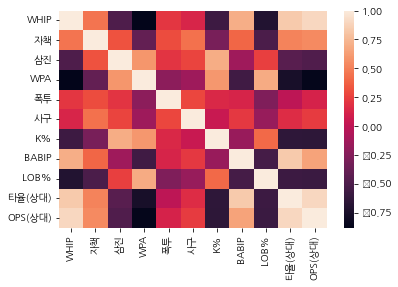

In [69]:
sns.heatmap(result.corr())  # 시각화

## 회귀분석

### 상관분석을 통해 연관성이 있다고 확인된 지표를 바탕으로 인과관계 분석 : 상관계수 + 0.5 이상의, -0.5 이하의 변수를 선택
### WPA, -K%, BABIP, LOB%, 타율(상대), OPS(상대)

In [71]:
# 데이터프레임 변수명 변경
result = result.rename(columns={'K%': 'K_pct','LOB%': 'LOB_pct', '타율(상대)': '타율_상대', 'OPS(상대)': 'OPS_상대'})

# 모델링
model = ols('WHIP ~ WPA + K_pct + BABIP + LOB_pct + 타율_상대 + OPS_상대', data=result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WHIP   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     116.1
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           3.20e-27
Time:                        23:04:04   Log-Likelihood:                 86.241
No. Observations:                  56   AIC:                            -158.5
Df Residuals:                      49   BIC:                            -144.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9659      0.217      4.454      0.000       0.530       1.402
WPA           -0.0271      0.010     -2.633      0.011      -0.048      -0.006
K_pct         -0.0358      0.006     -5.515      0.000      -0.049      -0.023
BABIP          7.9998      1.231      6.498      0.000       5.526      10.474
LOB_pct       -0.0015      0.002     -0.704      0.484      -0.006       0.003
타율_상대        -11.2214      1.925     -5.828      0.000     -15.091      -7.352
OPS_상대         2.3209      0.324      7.165      0.000       1.670       2.972
==============================================================================
Omnibus:                        0.851   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.653   Jarque-Bera (JB):                0.276
Skew:                           0.065   Prob(JB):                        0.871
Kurtosis:                       3.318   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""